In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [33]:
class LinearRegression:
    def __init__(self) -> None:
        self._coeff = None
        self._intercept = None
        

    def __repr__(self) -> str:
        return "Linear Regression Model from  Parent Class"

    def predict(self, X_new):
        """Output model prediction.

        Arguments:
        X_new: 1D or 2D numpy array
        """
        if len(X_new.shape) == 1: # check if X is 1D or 2D array
            X_new = X_new.reshape(-1,1) #reshape to column vector if 1D 

        
        self._predicted = self._intercept + np.dot(X_new, self._coeff)
        return self._predicted
    
    
    def error_metrics(self):
        self._fit  = np.dot(self._feature,self._coeff)+self._intercept
        self._residue = self._target - self._fit
        squared_error = (self._residue)**2
        self._sse = np.sum(squared_error)
        print(f"Sum of squared error for best fit: {self._sse}\n")
        self._mse = self._sse/len(self._target)
        print(f"Mean squared error for best fit: {self._mse}\n")
    
    def fit_plot(self):
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(self._target,self._fit,s=100,alpha=0.75,color='red',edgecolor='k')
        plt.plot(self._target,self._target,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

        

In [34]:
class NormalEquation(LinearRegression):
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        |x11 x12  .... x1n | 
        |x21 x22  .... x2n |
        | .   .     .   .  |
        | .   .     .   .  |
        |xm1 xm2  .... xmn |

        y: 1D numpy array
        | y1 |
        | y2 |
        | .  |
        | .  |
        | ym |
        """
        self._feature = X
        self._target = y
        
        if len(X.shape) == 1: # check if X is 1D or 2D array
            X = X.reshape(-1,1) #reshape to column vector if 1D 
            
        # add bias terms to feature matrix
        X_biased = np.c_[np.ones(X.shape[0]), X] #Adds a leading column of 1's to feature matrix to fit the intercept
        #| 1 x11 x12  .... x1n | 
        #| 1 x21 x22  .... x2n |
        #| .  .   .     .   .  |
        #| .  .   .     .   .  |
        #| 1 xm1 xm2  .... xmn |
        
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        sol = np.dot(inverse_xTx, xTy)
        
        self._intercept = sol[0]
        self._coeff = sol[1:]
        print(f"Fit intercept: {self._intercept}\n")
        print(f"Fit coefficients: {self._coeff}\n")

        
        



       

In [63]:
class LinearRegression1D(LinearRegression):
    def fit(self,X,y):
        self._feature = X
        self._target = y
        m = len(X)
        y = y.reshape(-1,1) #Make y a column vector
        self._coeff = ((m*(np.dot(X.T,y)))-((np.sum(X))*(np.sum(y))))/((m*(np.dot(X.T,X)))-((np.sum(X))**2))
        self._coeff = self._coeff[0]
        self._intercept = (((np.sum(y))*(np.dot(X.T,X)))-((np.sum(X))*(np.dot(X.T,y))))/((m*(np.dot(X.T,X)))-((np.sum(X))**2))[0]
        self._intercept = self._intercept[0][0]
        print(f"Fit intercept: {self._intercept}\n")
        print(f"Fit coefficients: {self._coeff}\n")
        

In [67]:
x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=2,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=42) #set for same data 

Fit intercept: 0.233023064105396

Fit coefficients: [42.28031425]



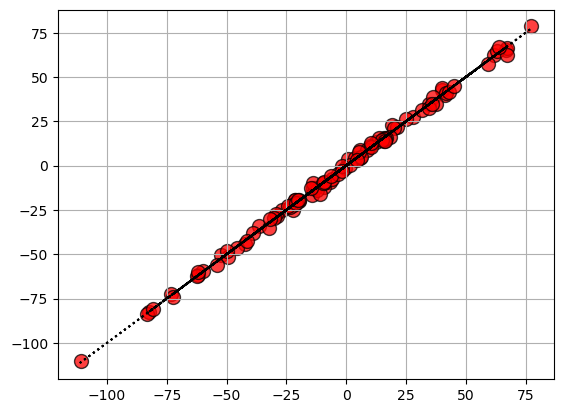

In [68]:
mlr = LinearRegression1D()
# mlr = NormalEquation()
mlr.fit(x,y)
y_pred = np.dot(x,mlr._coeff)+mlr._intercept


plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()



In [69]:
mlr.error_metrics()

Sum of squared error for best fit: 312.2170016849559

Mean squared error for best fit: 3.122170016849559



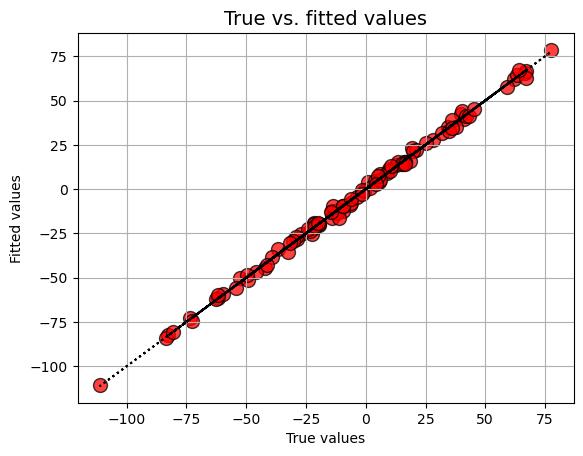

In [70]:
mlr.fit_plot()

In [40]:
x_pred = 10*np.random.random(size=(8,4))
x_pred

array([[1.01822634, 9.55670205, 2.2801644 , 9.21021202],
       [6.18102216, 7.6316727 , 9.84373512, 1.96852667],
       [5.67332542, 2.25796771, 7.6110175 , 2.50965931],
       [3.86529551, 2.52855088, 8.99020634, 9.94002325],
       [2.96296548, 4.99599351, 8.26737373, 1.41569604],
       [9.91900706, 3.81934181, 2.62741669, 5.13029004],
       [8.78045809, 4.49131428, 2.53844296, 5.34495882],
       [6.87868447, 5.55108601, 6.21584985, 0.43728605]])

In [41]:
y_pred=mlr.predict(x_pred)
y_pred

ValueError: shapes (8,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)